In [80]:
# Not sure I like this, but it seems to be the norm...
from qutip import *

import numpy as np
import matplotlib.pyplot as plt

from IPython.display import HTML
from matplotlib import animation

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams["figure.dpi"] = 75

from ipywidgets import interact

In [107]:
# A handy function for later
def plot_x_and_E(states):
    plt.subplots(figsize=(12,4),dpi=100)
    plt.subplot(121)
    ex = expect(x,states)
    std = variance(x,states)
    plt.plot(t,ex)
    plt.fill_between(t, ex+std, ex-std, alpha=0.2)
    plt.subplot(122)
    ex = expect(H,states)
    std = variance(H,states)
    plt.plot(t,ex)
    plt.fill_between(t, ex+std, ex-std, alpha=0.2)


# The Hamiltonian and initial state: A Coherent state

In [82]:
# Basic parameters
N = 35
w = 1 * 2 * np.pi              # 1 Hz oscillator frequency
t = np.linspace(0, 10, 401) # 4 periods for the time trace

Q = 10
kappa = w / Q

# Set up some operators
a = destroy(N)
n = num(N)
x = (a + a.dag())/np.sqrt(2)
p = -1j * (a - a.dag())/np.sqrt(2)
H = w * a.dag() * a

# The initial state
psi0 = coherent(N, 2.0)

# Decay: Collapse = annihilation operator

In [83]:
# The collapse operator 
c_ops = [np.sqrt(kappa) * a]

## Lindblad

In [84]:
me1 = mesolve(H, psi0, t, c_ops)

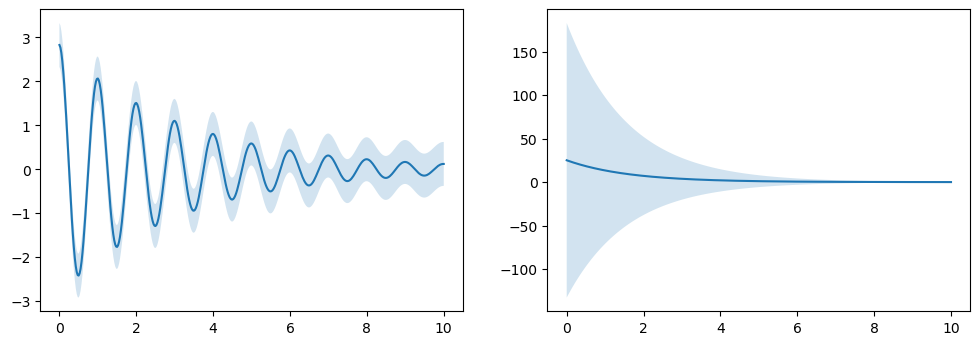

In [98]:
plot_x_and_E(me1.states)

This is pretty much what we expect: the state decays as a function of time. 

In [95]:
def update(i=0):
    plot_wigner(me1.states[i])
interact(update,i=(0,len(t)));

interactive(children=(IntSlider(value=0, description='i', max=401), Output()), _dom_classes=('widget-interact'…

<function __main__.update(i=0)>

## Trajectories

In [28]:
mc1 = mcsolve(H, psi0, t, c_ops)

10.0%. Run time:   1.30s. Est. time left: 00:00:00:11
20.0%. Run time:   2.44s. Est. time left: 00:00:00:09
30.0%. Run time:   3.63s. Est. time left: 00:00:00:08
40.0%. Run time:   4.80s. Est. time left: 00:00:00:07
50.0%. Run time:   6.01s. Est. time left: 00:00:00:06
60.0%. Run time:   7.20s. Est. time left: 00:00:00:04
70.0%. Run time:   8.40s. Est. time left: 00:00:00:03
80.0%. Run time:   9.77s. Est. time left: 00:00:00:02
90.0%. Run time:  11.25s. Est. time left: 00:00:00:01
100.0%. Run time:  12.62s. Est. time left: 00:00:00:00
Total run time:  12.70s


The first ensemble member:

In [100]:
def update(j=0):
    plot_x_and_E(mc1.states[j])
interact(update,j=(0,499));

interactive(children=(IntSlider(value=0, description='j', max=499), Output()), _dom_classes=('widget-interact'…

What is going on? In the MC simulation, all ensemble members are the same since the coherent states commutes with the collapse operator!

In [102]:
def update(i=0,j=0):
    plot_wigner(mc1.states[j][i])
interact(update,i=(0,len(t)),j=(0,499));

interactive(children=(IntSlider(value=0, description='i', max=401), IntSlider(value=0, description='j', max=49…

# Measure photon number, no decay

In [112]:
# The collapse operator 
c_ops = [np.sqrt(kappa) * a.dag()*a]

## Lindblad

In [113]:
me2 = mesolve(H, psi0, t, c_ops)

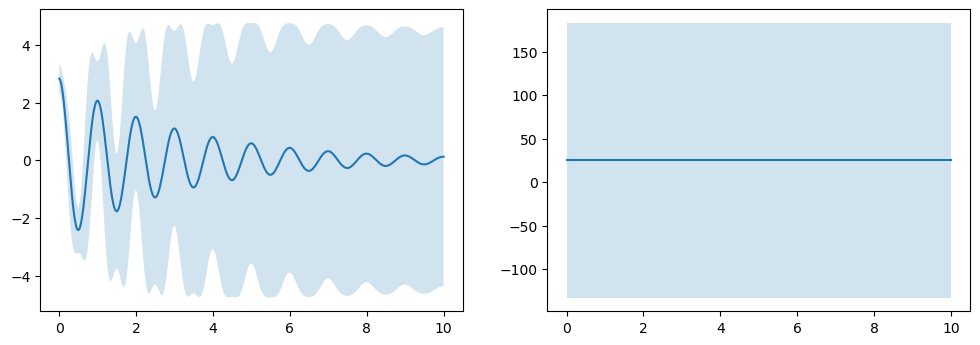

In [115]:
plot_x_and_E(me2.states)

In [103]:
def update(i=0):
    plot_wigner(me2.states[i])
interact(update,i=(0,len(t)));

interactive(children=(IntSlider(value=0, description='i', max=401), Output()), _dom_classes=('widget-interact'…

Of course! Measuring photon number increases the uncertainty in phase!!!!!

## Trajectories

In [75]:
mc2 = mcsolve(H, psi0, t, c_ops, ntraj=[500])

10.0%. Run time:   2.55s. Est. time left: 00:00:00:22
20.0%. Run time:   5.51s. Est. time left: 00:00:00:22
30.0%. Run time:   8.36s. Est. time left: 00:00:00:19
40.0%. Run time:  10.99s. Est. time left: 00:00:00:16
50.0%. Run time:  13.74s. Est. time left: 00:00:00:13
60.0%. Run time:  16.21s. Est. time left: 00:00:00:10
70.0%. Run time:  19.08s. Est. time left: 00:00:00:08
80.0%. Run time:  21.44s. Est. time left: 00:00:00:05
90.0%. Run time:  23.97s. Est. time left: 00:00:00:02
100.0%. Run time:  26.69s. Est. time left: 00:00:00:00
Total run time:  26.74s


In [104]:
def update(j=0):
    plot_x_and_E(mc2.states[j])
interact(update,j=(0,499));

interactive(children=(IntSlider(value=0, description='j', max=499), Output()), _dom_classes=('widget-interact'…

In [106]:
def update(i=0,j=0):
    plot_wigner(mc2.states[j][i])
interact(update,i=(0,len(t)-1),j=(0,499));

interactive(children=(IntSlider(value=0, description='i', max=400), IntSlider(value=0, description='j', max=49…

# Measure photon number, with decay, equal rates

In [116]:
# The collapse operator 
c_ops = [np.sqrt(kappa) * a.dag()*a, np.sqrt(kappa) * a]

## Lindblad

In [121]:
me3 = mesolve(H, psi0, t, c_ops)

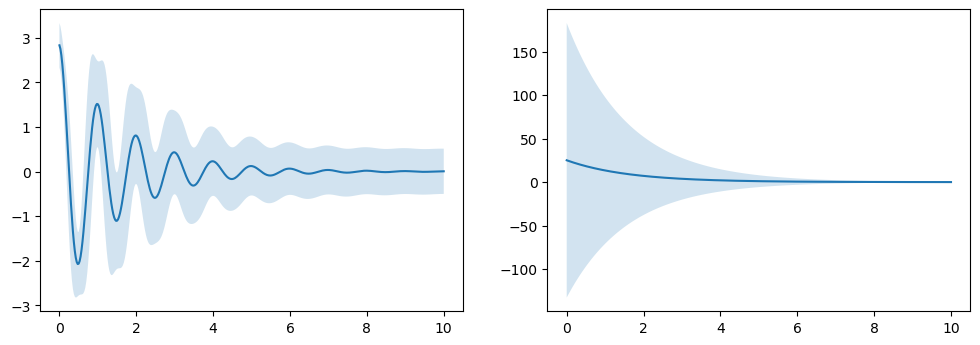

In [122]:
plot_x_and_E(me3.states)

In [103]:
def update(i=0):
    plot_wigner(me2.states[i])
interact(update,i=(0,len(t)));

interactive(children=(IntSlider(value=0, description='i', max=401), Output()), _dom_classes=('widget-interact'…

## Trajectories

In [119]:
mc2 = mcsolve(H, psi0, t, c_ops, ntraj=[500])

10.0%. Run time:   1.63s. Est. time left: 00:00:00:14
20.0%. Run time:   3.07s. Est. time left: 00:00:00:12
30.0%. Run time:   4.51s. Est. time left: 00:00:00:10
40.0%. Run time:   5.94s. Est. time left: 00:00:00:08
50.0%. Run time:   7.43s. Est. time left: 00:00:00:07
60.0%. Run time:   8.88s. Est. time left: 00:00:00:05
70.0%. Run time:  10.59s. Est. time left: 00:00:00:04
80.0%. Run time:  12.13s. Est. time left: 00:00:00:03
90.0%. Run time:  13.65s. Est. time left: 00:00:00:01
100.0%. Run time:  15.19s. Est. time left: 00:00:00:00
Total run time:  15.26s


In [120]:
def update(j=0):
    plot_x_and_E(mc2.states[j])
interact(update,j=(0,499));

interactive(children=(IntSlider(value=0, description='j', max=499), Output()), _dom_classes=('widget-interact'…

In [106]:
def update(i=0,j=0):
    plot_wigner(mc2.states[j][i])
interact(update,i=(0,len(t)-1),j=(0,499));

interactive(children=(IntSlider(value=0, description='i', max=400), IntSlider(value=0, description='j', max=49…

# Measure photon number, with decay:  measure photons 10 times faster

In [123]:
# The collapse operator 
c_ops = [np.sqrt(kappa*10) * a.dag()*a, np.sqrt(kappa) * a]

## Lindblad

In [124]:
me4 = mesolve(H, psi0, t, c_ops)

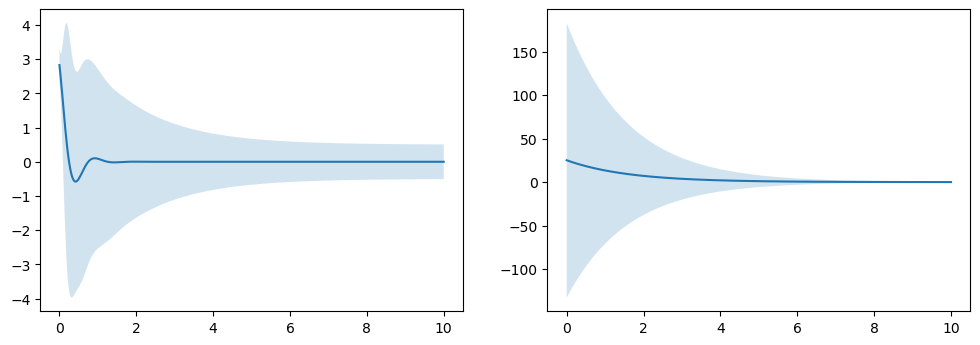

In [125]:
plot_x_and_E(me4.states)

In [126]:
def update(i=0):
    plot_wigner(me2.states[i])
interact(update,i=(0,len(t)));

interactive(children=(IntSlider(value=0, description='i', max=401), Output()), _dom_classes=('widget-interact'…

## Trajectories

In [119]:
mc2 = mcsolve(H, psi0, t, c_ops, ntraj=[500])

10.0%. Run time:   1.63s. Est. time left: 00:00:00:14
20.0%. Run time:   3.07s. Est. time left: 00:00:00:12
30.0%. Run time:   4.51s. Est. time left: 00:00:00:10
40.0%. Run time:   5.94s. Est. time left: 00:00:00:08
50.0%. Run time:   7.43s. Est. time left: 00:00:00:07
60.0%. Run time:   8.88s. Est. time left: 00:00:00:05
70.0%. Run time:  10.59s. Est. time left: 00:00:00:04
80.0%. Run time:  12.13s. Est. time left: 00:00:00:03
90.0%. Run time:  13.65s. Est. time left: 00:00:00:01
100.0%. Run time:  15.19s. Est. time left: 00:00:00:00
Total run time:  15.26s


In [120]:
def update(j=0):
    plot_x_and_E(mc2.states[j])
interact(update,j=(0,499));

interactive(children=(IntSlider(value=0, description='j', max=499), Output()), _dom_classes=('widget-interact'…

In [106]:
def update(i=0,j=0):
    plot_wigner(mc2.states[j][i])
interact(update,i=(0,len(t)-1),j=(0,499));

interactive(children=(IntSlider(value=0, description='i', max=400), IntSlider(value=0, description='j', max=49…